In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_kernel(x, x_i, tau):
    return np.exp(-np.sum((x - x_i) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau):
    n = X.shape[0]
    y_pred = np.zeros_like(x)
    for i in range(len(x)):
        weights = np.array([gaussian_kernel(x[i], X[j], tau) for j in range(n)])
        theta = np.linalg.inv(X.T @ np.diag(weights) @ X) @ X.T @ np.diag(weights) @ y
        y_pred[i] = np.dot(x[i], theta)
    return y_pred

In [3]:
np.random.seed(0)
X = np.random.uniform(-5, 5, 100)
y = 2 * np.sin(X) + np.random.normal(0, 0.5, size=100)

tau = 0.3

x_test = np.linspace(-5, 5, 1000)
y_pred = locally_weighted_regression(x_test, X[:, np.newaxis], y, tau)

C:\Users\alexm\AppData\Local\Temp\ipykernel_13372\2736367952.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.dot(x[i], theta)


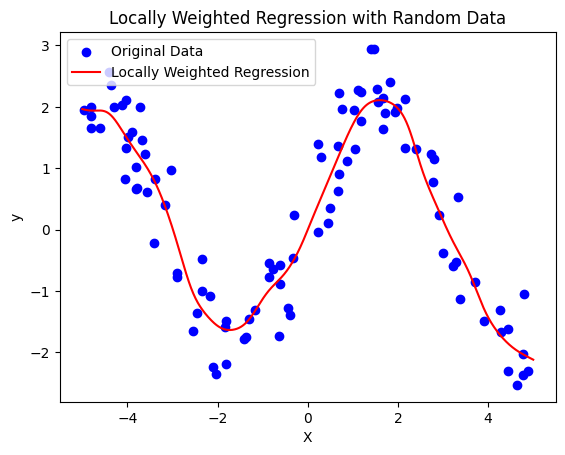

In [7]:
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(x_test, y_pred, color='red', label='Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression with Random Data')
plt.legend()
plt.show()